# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
##pd.set_option('display.max_rows', None)
import math
from scipy import stats
from scipy.stats import skew, norm

import matplotlib.pyplot as plt
import matplotlib
palette = plt.get_cmap('Set2')
import seaborn as sns
plt.style.use('seaborn-darkgrid')
##%matplotlib inline
import missingno as msno

from datetime import datetime, timedelta
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
telecom_df = pd.read_csv('/content/sample_data/telecom_users.csv', index_col=0)

# 1. Описание данных

In [ ]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


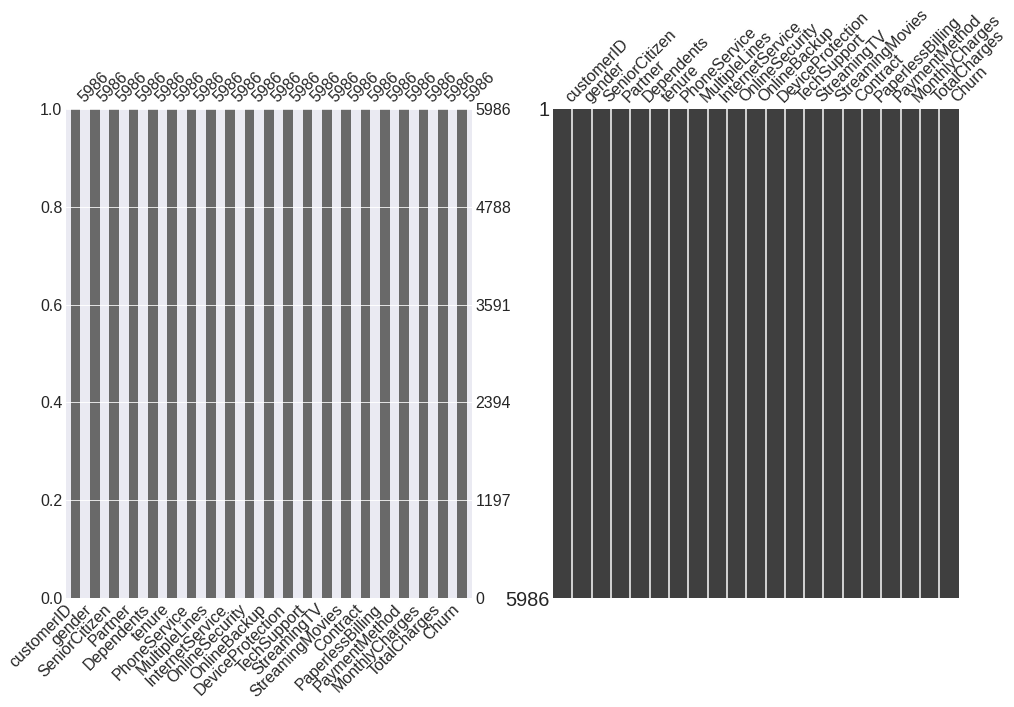

In [ ]:
#изучение пропущенных значений 

print(telecom_df.isnull().sum())
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
msno.bar(telecom_df, figsize=(10, 7), ax=axes[0])
msno.matrix(telecom_df, figsize=(10, 7), ax=axes[1])
plt.show()

In [ ]:
#ни одного пропущенного значения 

Изучение столбцов 

In [ ]:
print(telecom_df.dtypes)
print(telecom_df.describe(include=[np.number]))
print(telecom_df.describe(include=[np.object]))

for column in telecom_df.columns:
    print('Уникальные значения столбца {}:\n{}'.format(column, np.sort(telecom_df[column].unique())))

telecom_df['SeniorCitizen'].replace({0:'No', 1:'Yes'}, inplace=True)
print(telecom_df.loc[telecom_df['TotalCharges'] == ' ', :])

telecom_df.loc[telecom_df['TotalCharges'] == ' ', 'TotalCharges'] = 0
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].astype(np.float64)
print('Доход компании за весь период датасета:', telecom_df['TotalCharges'].sum())

for column in telecom_df.columns:
    print('Column name:', column)
    print(telecom_df[column].value_counts().nlargest(5), '\n')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges
count    5986.000000  5986.000000     5986.000000
mean        0.161377    32.468760       64.802213
std         0.367909    24.516391       30.114702
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.650000
50%         0.000000    29.000000       70.400000
75%         0.000000    56.000000       89.90000

Количество клиентов компании -  5986.
3050 клиентов - мужчины.
4399 - клиенты в настоящее время.
Максимальный максимальный период пользования - 72 месяца. 
Заработок за 6 лет равен почти 14 млн. USD
Средняя сумма месячного пользования = 64.80 USD 

**Вероятностное** **распределение**

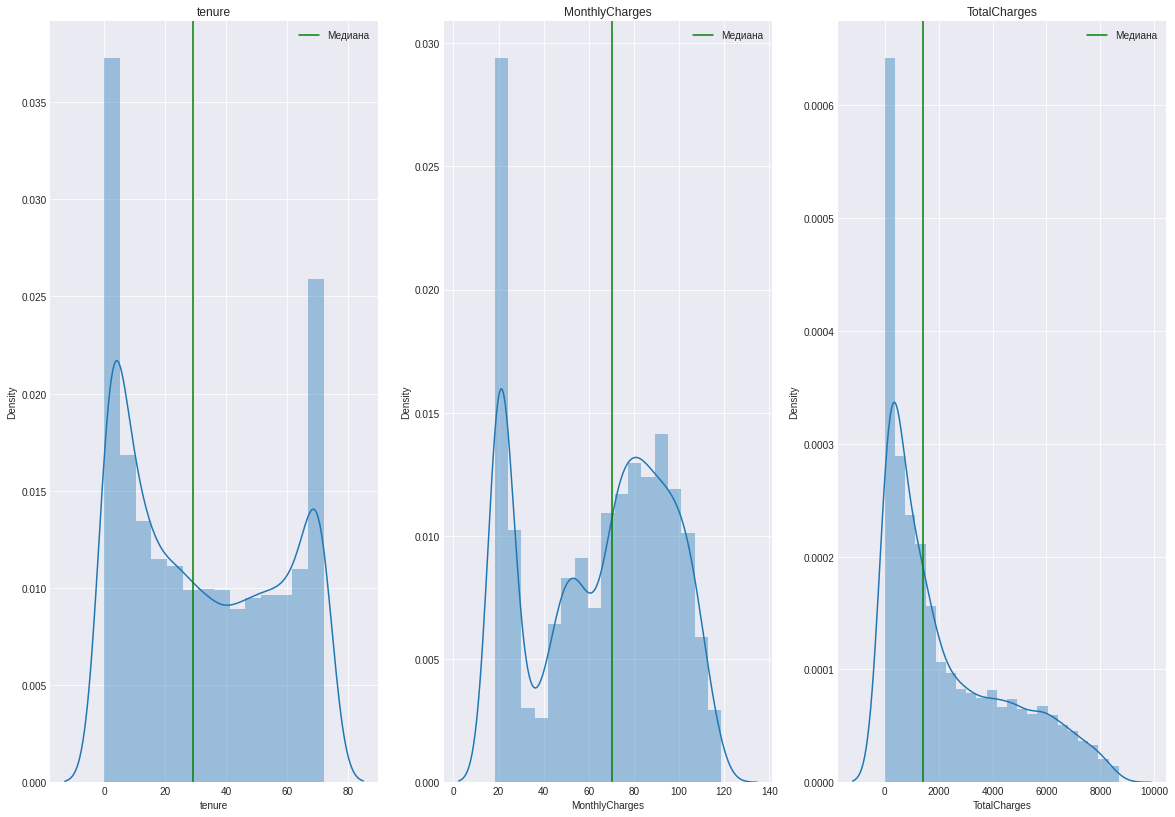

In [ ]:
# оставим только столбцы с данными типа int64 и float64
telecom_df_for_dist = telecom_df.loc[:, telecom_df.dtypes!='object']
fig, axes = plt.subplots(1, len(telecom_df_for_dist.columns), figsize=(20, 14))
for i, column in enumerate(telecom_df_for_dist.columns):
    sns.distplot(telecom_df_for_dist[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].axvline(telecom_df_for_dist[column].median(), c='g', label='Медиана')
    axes[i].legend(loc='best')
plt.show()

Для графиков срока пользования (tenure) и месячной платы (MonthlyCharges) можно пронаблюдать кластеризацию значений.

**Распределение по категориям**

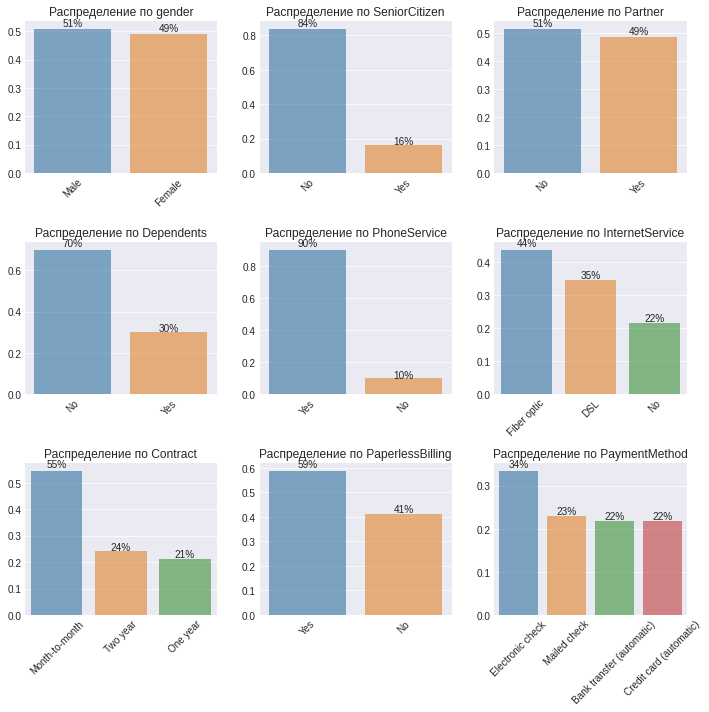

In [ ]:
main_columns_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract',
'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
# пройдемся по каждому основному столбцу
for ax, column in zip(axes.ravel(), main_columns_1):
    # посчитаем распределение по уникальным значениям столбца.
    data = (telecom_df[column].value_counts() / len(telecom_df)).to_frame().reset_index()
    sns.barplot(y=data.columns[1], x='index', data=data, alpha=0.6, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по {column}')
    ax.legend()

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x+width/2, y+height*1.02), ha='center')

plt.tight_layout()
plt.show()



*   Почти все клиенты подключены к услуге телефонной связи.
*   Большинство клиентов это не пенсионеры.
*   Гендерное распределение клентов почти равное.
*   Большая часть не имеет детей.
*   Поровну распределились люди находящиеся в браке и холостые.
*   Большинстов клиентов выбрали month-to-month типом контракта, затем идет двухгодовой контракт и контракт на один год.
*   Наиболее популярный метод оплаты это electronic check, затем не имея особых отличий идут mailed check, bank transfer, credit card.



**Отток клиентов**

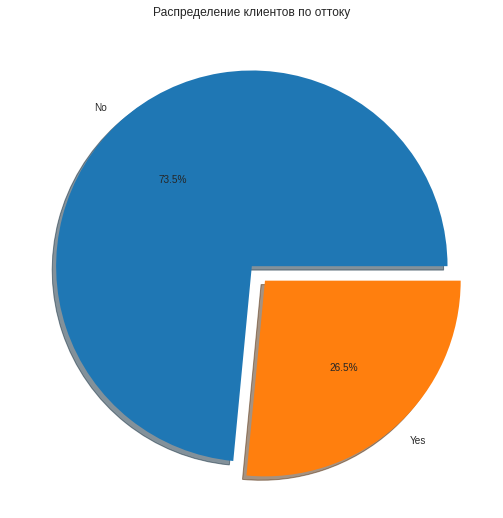

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
telecom_df['Churn'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.ylabel(None)
plt.title('Распределение клиентов по оттоку')
plt.show()

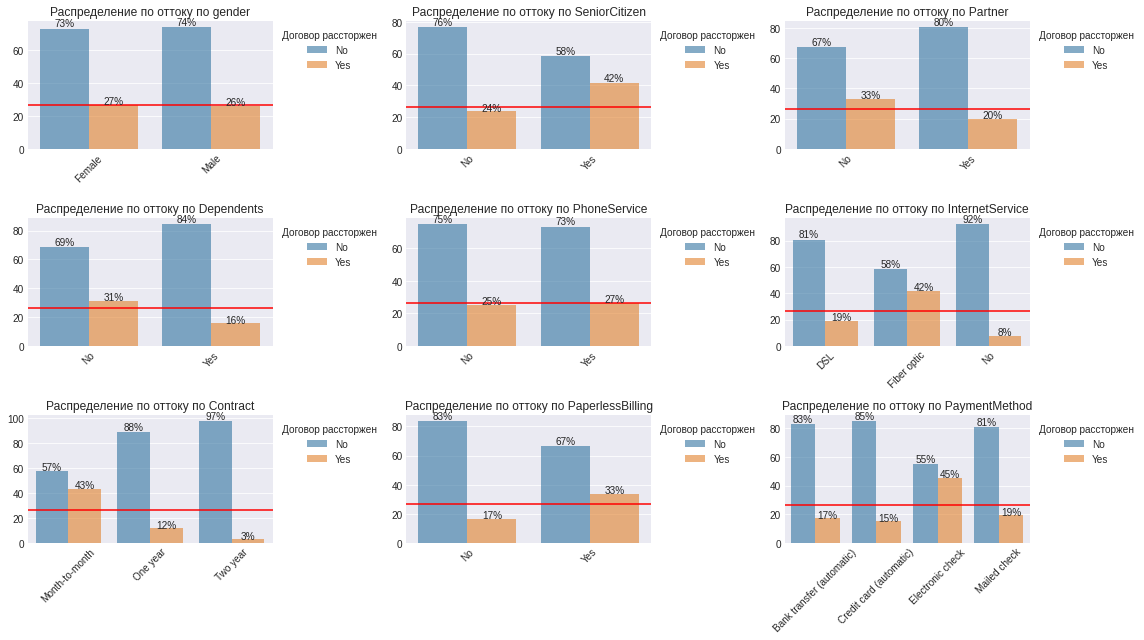

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 9))
for ax, column in zip(axes.ravel(), main_columns_1):
    data = telecom_df\
    .groupby(['Churn', column])[column]\
    .count()\
    .groupby(column).apply(lambda x: 100 * x / x.sum())\
    .to_frame().stack().reset_index()

    sns.barplot(x=column, y=0, hue='Churn', data=data, ax=ax, alpha=0.6)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по оттоку по {column}')
    ax.legend(title='Договор рассторжен', loc=2, bbox_to_anchor=(1, 1), fontsize=10)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/100:.0%}', (x+width/2, y+height*1.02), ha='center')
    ax.axhline(26.5, c='r')
plt.tight_layout()
plt.show()

**Отток клиентов = 26.5 %**


*   Пенсионеры чаще других отказваются от плана. Причиной может быть либо уход человека из жизни, либо отсутствие подходящего тарифа с контентом для этой группы людей.
*   Клиенты без детей чаще прекращают использовать услуги. Причиной может быть отсутсвие подходящего тарифа для пользователей без детей.  
*   Среди клиентов, пользующихся услугой телефонной связи, не наблюдается отклонения от общей картины.
*   Клиенты, пользующиеся онлайн-оплатой, чаще рассторгают договор с фирмой.

Смотря на всё, можно предполагать, что уйдут в первую очередь клиенты SeniorCitizen, InternetService (Fiber optic), Contract (month-to-month), PaymentMethod (electronic check).



# 2. Исследование зависимостей и формулирование гипотез

Количество подключенных услуг у каждого клиента 

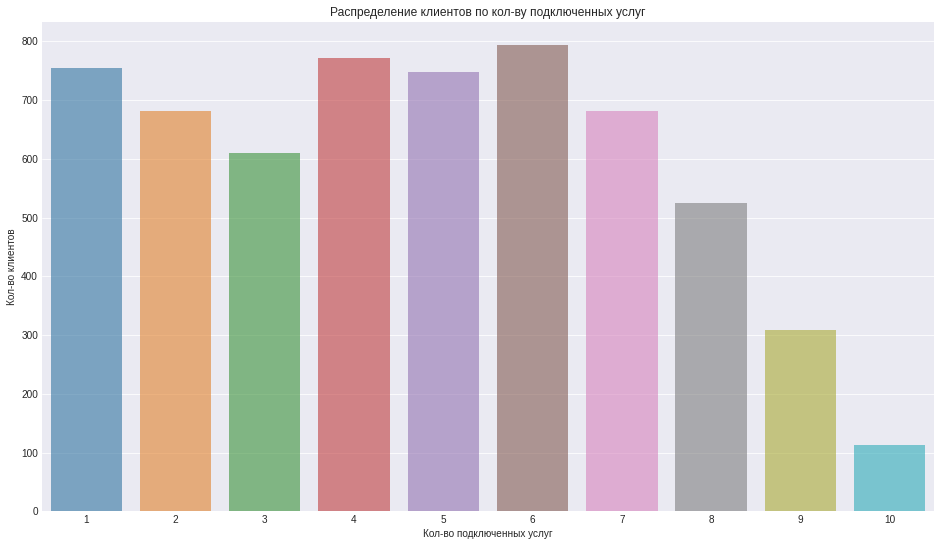

In [ ]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
telecom_df_for_services_calculation = telecom_df.copy()
telecom_df_for_services_calculation[services_columns] = telecom_df_for_services_calculation[services_columns]\
.replace({'No':0, 'Yes':1, 'No phone service':0, 'Fiber optic':1, 'DSL':1, 'No internet service':0})

telecom_df['services'] = telecom_df_for_services_calculation[services_columns].sum(axis=1)

fig, axes = plt.subplots(figsize=(16,9))
sns.barplot(x=telecom_df['services'].value_counts().reset_index()['index'],
            y=telecom_df['services'].value_counts().reset_index()['services'],
            alpha=0.6)
plt.xlabel('Кол-во подключенных услуг')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение клиентов по кол-ву подключенных услуг')
plt.show()

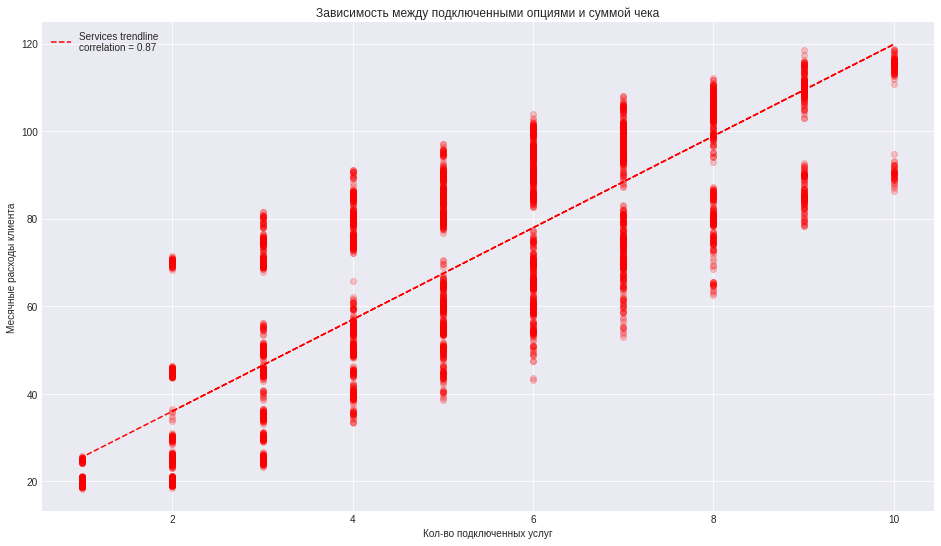

In [ ]:
fig, axes = plt.subplots(figsize=(16,9))
plt.scatter(telecom_df['services'], telecom_df['MonthlyCharges'], c='r', alpha=0.2)

def plot_trendline(x, y, degree, color, name):
    trend = np.polyfit(x, y, degree)
    trendline = np.poly1d(trend)
    
    coef_corr = x.corr(y)
    return plt.plot(x, trendline(x), f'{color}--', label=f'{name} trendline\ncorrelation = {coef_corr:.2}')

plot_trendline(telecom_df['services'], telecom_df['MonthlyCharges'], 1, 'r', 'Services')
plt.xlabel('Кол-во подключенных услуг')
plt.ylabel('Месячные расходы клиента')
plt.title('Зависимость между подключенными опциями и суммой чека')
plt.legend()
plt.show()

Что и можно было ожидать - видим зависмость от количестваа подключенных услуг клиента к рассходам клиента 

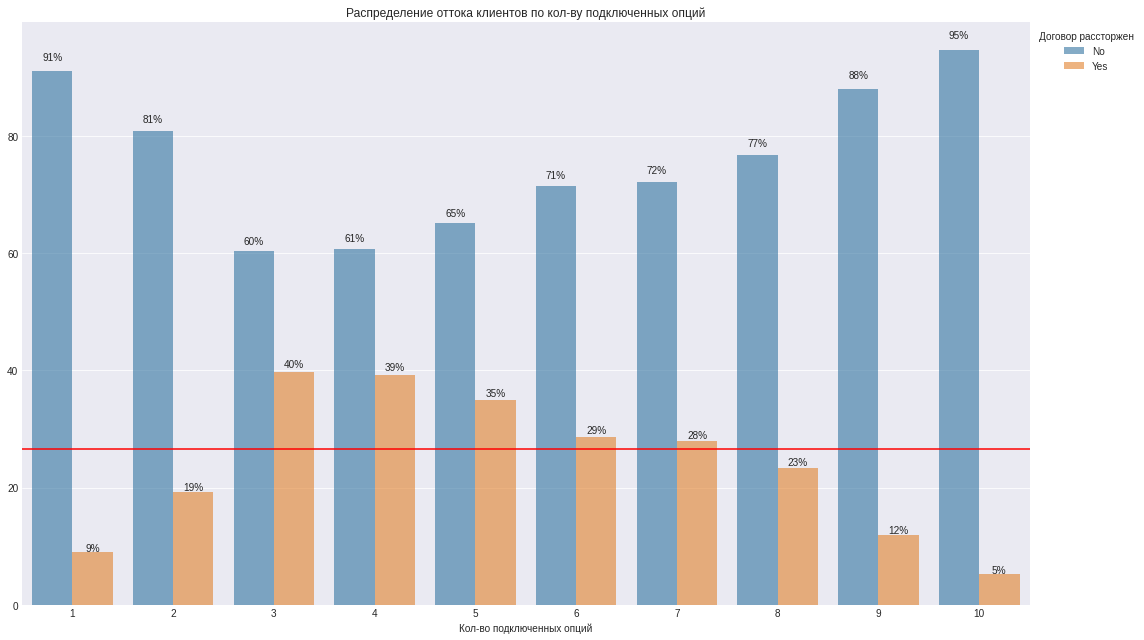

In [ ]:
data = telecom_df\
.groupby(['Churn', 'services'])['services']\
.count()\
.groupby('services').apply(lambda x: 100 * x / x.sum())\
.to_frame().stack().reset_index()

fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x='services', y=0, hue='Churn', data=data, alpha=0.6)
ax.set_xlabel('Кол-во подключенных опций')
ax.set_ylabel(None)
ax.set_title(f'Распределение оттока клиентов по кол-ву подключенных опций')
ax.legend(title='Договор рассторжен', loc=2, bbox_to_anchor=(1, 1), fontsize=10)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/100:.0%}', (x+width/2, y+height*1.02), ha='center')
ax.axhline(26.5, c='r')
plt.tight_layout()
plt.show()

Высокие показатели оттока у клиентов с 3-5 подключенными услугами

Исследование трат клиента от времени подключения к услугам компании

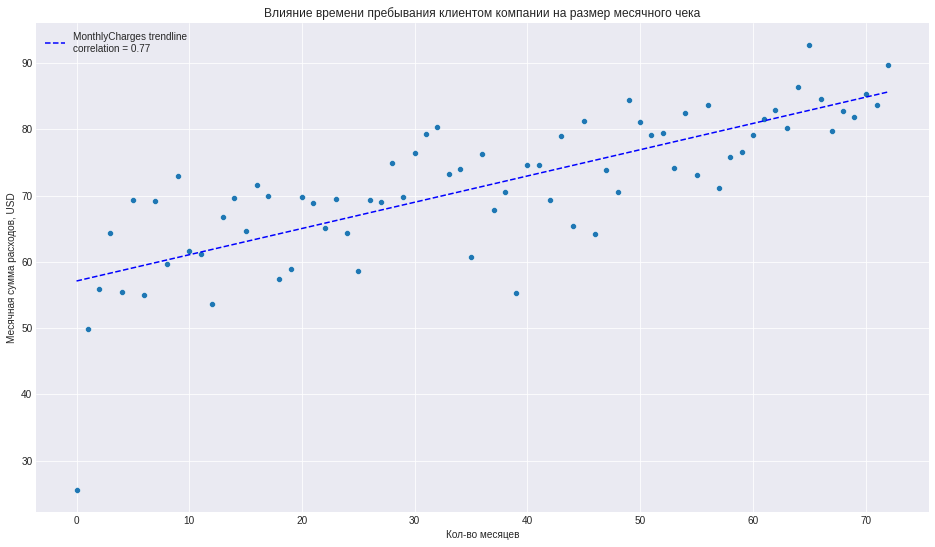

In [ ]:
telecom_df_for_monthlycharges_by_tenure = telecom_df[['tenure', 'MonthlyCharges']]\
                                          .groupby('tenure').median().reset_index()
x = telecom_df_for_monthlycharges_by_tenure['tenure']
y = telecom_df_for_monthlycharges_by_tenure['MonthlyCharges']
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x, y=y)
plot_trendline(x, y, 1, 'b', 'MonthlyCharges')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Чем дольше люди являются клиентами компании, тем больше они тратят в месяц на услуги компании.

Распределение данных для тех, кто рассторг договор, и тех, кто продолжает пользоваться услугами компании.

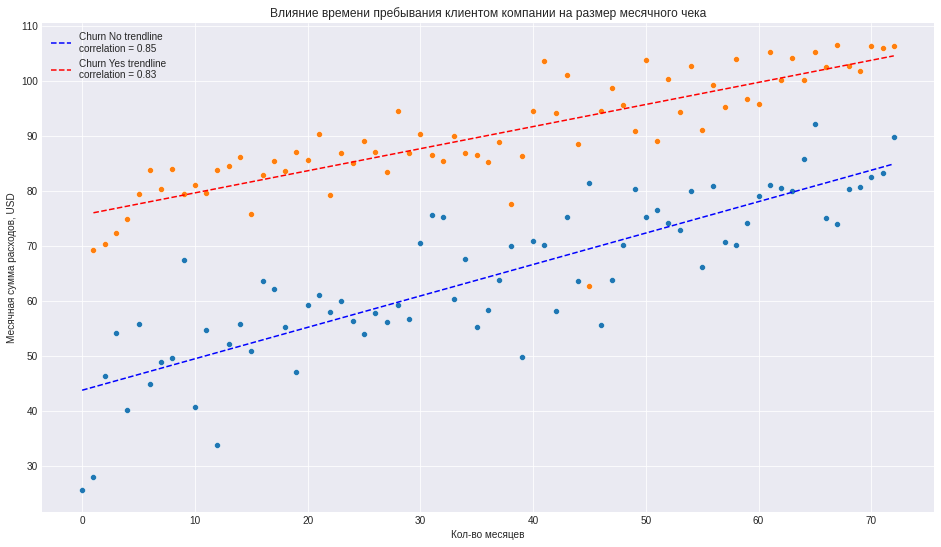

In [ ]:
telecom_df_for_monthlycharges_by_tenure_churn = telecom_df[['Churn', 'tenure', 'MonthlyCharges']]\
                                          .groupby(['Churn', 'tenure']).median().reset_index()
x_0 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'No']['tenure']
y_0 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'No']['MonthlyCharges']
x_1 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'Yes']['tenure']
y_1 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'Yes']['MonthlyCharges']
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)

plot_trendline(x_0, y_0, 1, 'b', 'Churn No')
plot_trendline(x_1, y_1, 1, 'r', 'Churn Yes')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Люди, отказавшиеся от услуг компании, тратили явно больше, чем те, кто остался её клиентом. Также видно разделение на клессы. 

Исследование влияния времени пребывания клиентом компании на кол-во подключенных опций. 

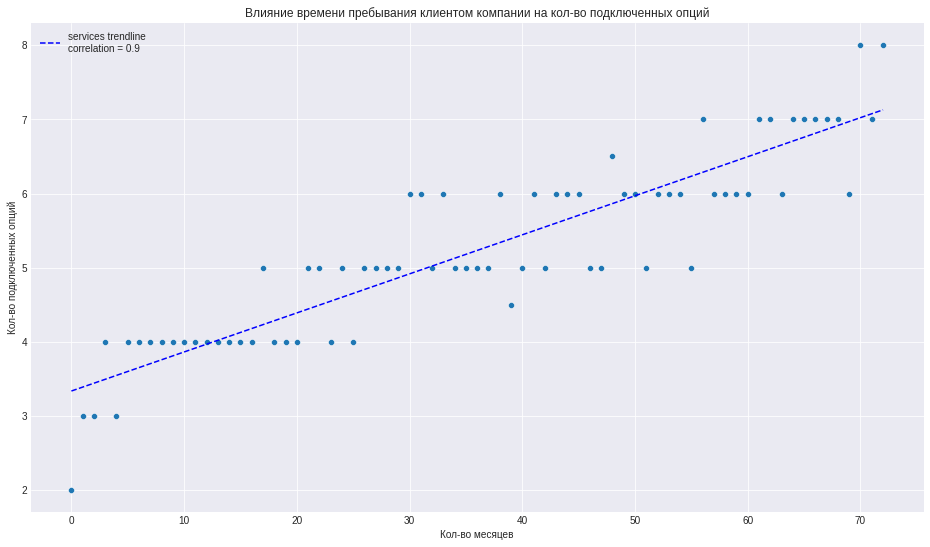

In [ ]:
telecom_df_for_services_by_tenure = telecom_df[['tenure', 'services']]\
                                          .groupby('tenure').median().reset_index()
x = telecom_df_for_services_by_tenure['tenure']
y = telecom_df_for_services_by_tenure['services']

fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x, y=y)

plot_trendline(x, y, 1, 'b', 'services')
plt.title('Влияние времени пребывания клиентом компании на кол-во подключенных опций')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Кол-во подключенных опций')
plt.legend()
plt.show()

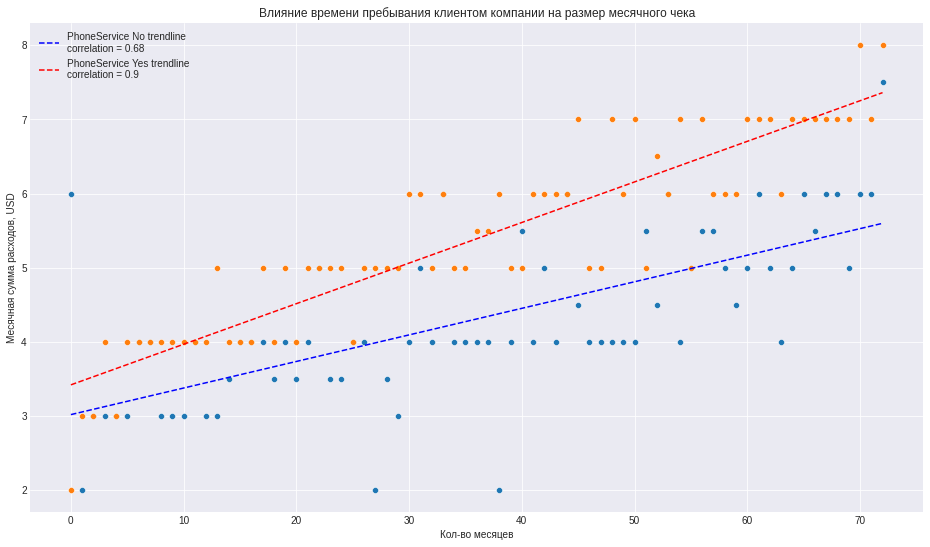

In [ ]:
telecom_df_for_services_by_tenure_phoneservice = telecom_df[['PhoneService', 'tenure', 'services']]\
                                          .groupby(['PhoneService', 'tenure']).median().reset_index()
x_0 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'No']\
['tenure']
y_0 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'No']\
['services']
x_1 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'Yes']\
['tenure']
y_1 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'Yes']\
['services']

fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)

plot_trendline(x_0, y_0, 1, 'b', 'PhoneService No')
plot_trendline(x_1, y_1, 1, 'r', 'PhoneService Yes')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

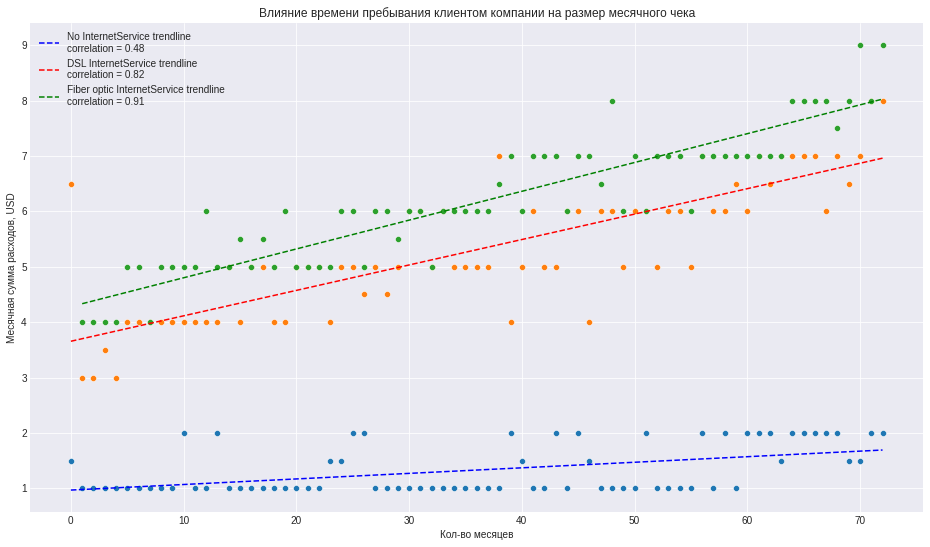

In [ ]:
telecom_df_for_services_by_tenure_internetservice = telecom_df[['InternetService', 'tenure', 'services']]\
                                          .groupby(['InternetService', 'tenure']).median().reset_index()
x_0 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'No']\
['tenure']
y_0 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'No']\
['services']
x_1 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'DSL']\
['tenure']
y_1 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'DSL']\
['services']
x_2 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'Fiber optic']\
['tenure']
y_2 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'Fiber optic']\
['services']

fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
sns.scatterplot(x=x_2, y=y_2)

plot_trendline(x_0, y_0, 1, 'b', 'No InternetService')
plot_trendline(x_1, y_1, 1, 'r', 'DSL InternetService')
plot_trendline(x_2, y_2, 1, 'g', 'Fiber optic InternetService')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

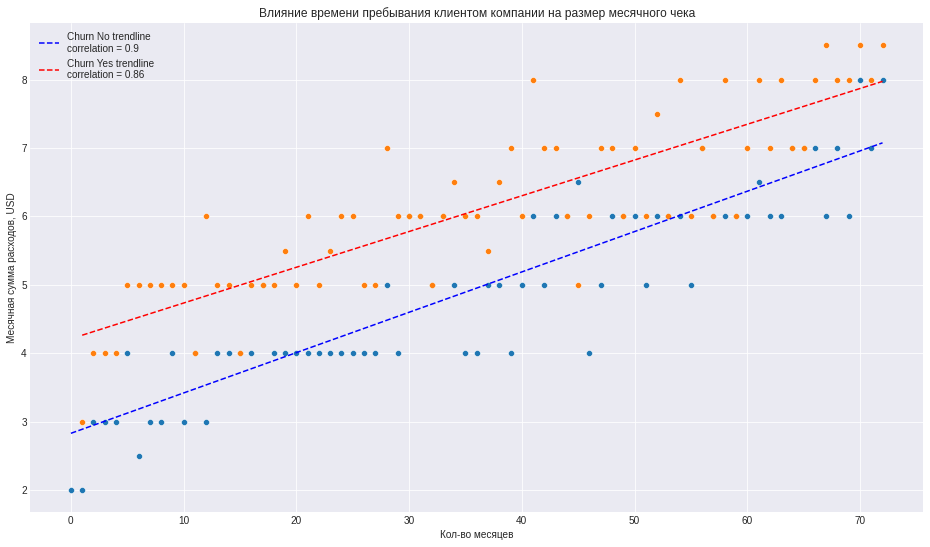

In [ ]:
telecom_df_for_services_by_tenure_churn = telecom_df[['Churn', 'tenure', 'services']]\
                                          .groupby(['Churn', 'tenure']).median().reset_index()
x_0 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'No']['tenure']
y_0 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'No']['services']
x_1 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'Yes']['tenure']
y_1 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'Yes']['services']

fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)

plot_trendline(x_0, y_0, 1, 'b', 'Churn No')
plot_trendline(x_1, y_1, 1, 'r', 'Churn Yes')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Видно, что со временем клиенты начинают пользоваться все большим кол-вом услуг компании.

Клиенты с большим кол-вом подключенных услуг чаще рассторгали договор с компанией.

Корреляционный анализ количественных данных. 

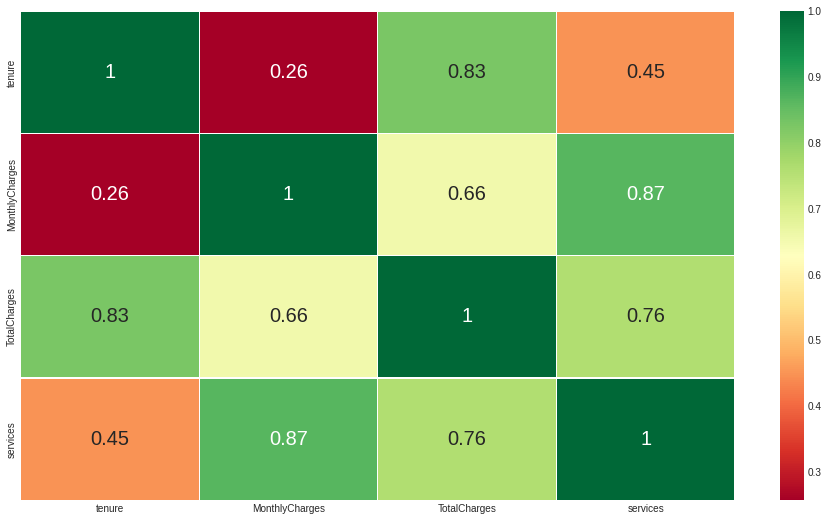

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(telecom_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'services']].corr(), annot=True, cmap='RdYlGn',\
            linewidths=0.2, annot_kws={'size':20})
plt.show()

Почти все столбцы коррелируют между собой

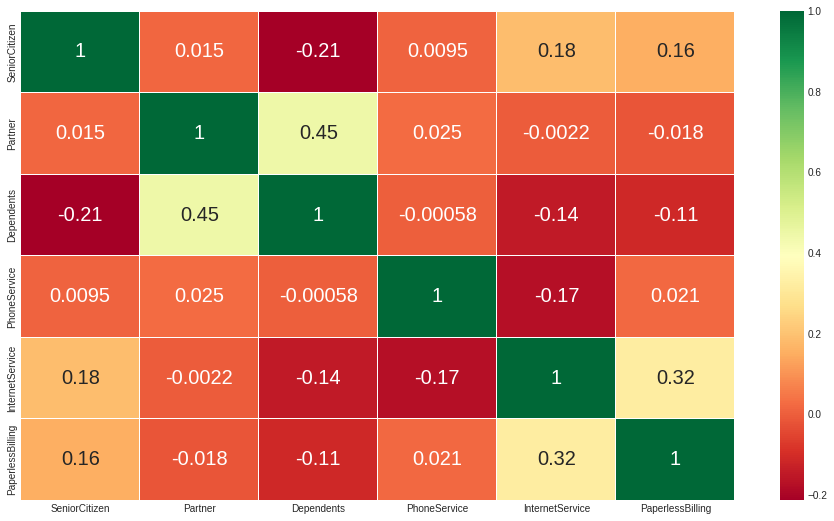

In [ ]:
from sklearn.metrics import matthews_corrcoef



telecom_df_for_corr = telecom_df.copy()
telecom_df_for_corr['InternetService'].replace({'Fiber optic':'Yes', 'DSL':'Yes'}, inplace=True)
matthew_corr_columns_1 = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'PaperlessBilling']

def matthews_corr(df):
    corr_dict = {column:[] for column in df.columns}
    for column_1 in df.columns:
        for column_2 in df.columns:
            corr_dict[column_1] += [matthews_corrcoef(df[column_1], df[column_2])]
    corr_df = pd.DataFrame(data=corr_dict, index=df.columns, columns=df.columns)
    return corr_df

fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(\
matthews_corr(telecom_df_for_corr[matthew_corr_columns_1]),
annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

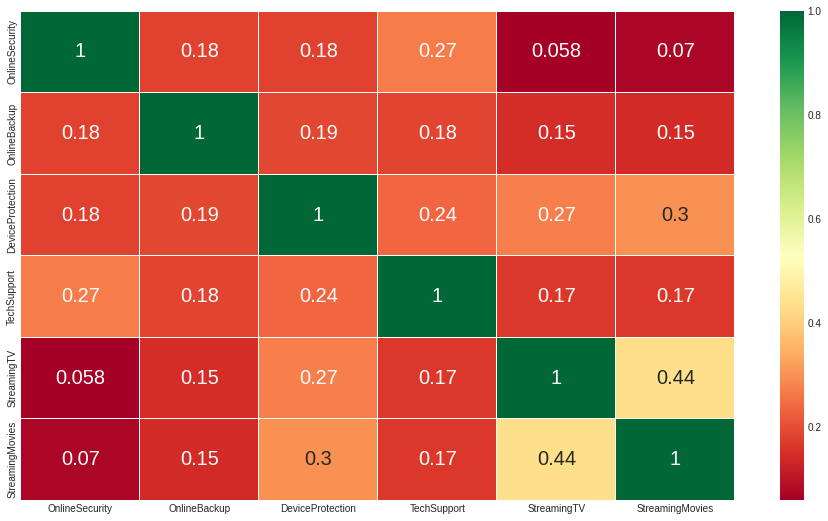

In [ ]:
telecom_df_for_corr_IS = telecom_df_for_corr[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                              'TechSupport', 'StreamingTV', 'StreamingMovies']]
telecom_df_for_corr_IS = telecom_df_for_corr_IS[telecom_df_for_corr_IS != 'No internet service']
telecom_df_for_corr_IS.dropna(inplace=True)
telecom_df_for_corr_IS



fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(\
matthews_corr(telecom_df_for_corr_IS),
annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

# 3. Построение моделей для прогнозирования оттока

Для начала нухно подготовить данные для построения модели

In [ ]:
for column in telecom_df.columns:
    print(f'Колонка {column}, {len(telecom_df[column].unique())} уникальных значений')
    print(telecom_df[column].unique())


Колонка customerID, 5986 уникальных значений
['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
Колонка gender, 2 уникальных значений
['Male' 'Female']
Колонка SeniorCitizen, 2 уникальных значений
['No' 'Yes']
Колонка Partner, 2 уникальных значений
['Yes' 'No']
Колонка Dependents, 2 уникальных значений
['Yes' 'No']
Колонка tenure, 73 уникальных значений
[72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 26 31  7 35  6 13 23  9
 45 17 34 58 12 25 28 29 43 19 41 37 27 22 24 18 56 66 59 48 47 61 21  0
 36]
Колонка PhoneService, 2 уникальных значений
['Yes' 'No']
Колонка MultipleLines, 3 уникальных значений
['Yes' 'No' 'No phone service']
Колонка InternetService, 3 уникальных значений
['No' 'Fiber optic' 'DSL']
Колонка OnlineSecurity, 3 уникальных значений
['No internet service' 'No' 'Yes']
Колонка OnlineBackup, 3 уникальных значений
['No internet service' 'Yes' 'No']
Колонка DeviceProt

In [ ]:
telecom_df['tenure_years'] = pd.cut(telecom_df['tenure'], 6, labels=range(1, 7))

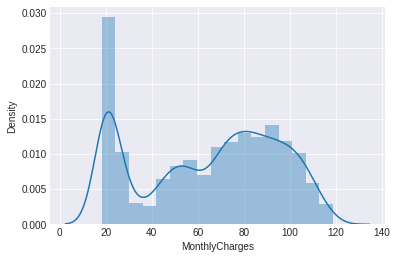

In [ ]:
sns.distplot(telecom_df['MonthlyCharges'])
plt.show()

Видим наличие кластера 

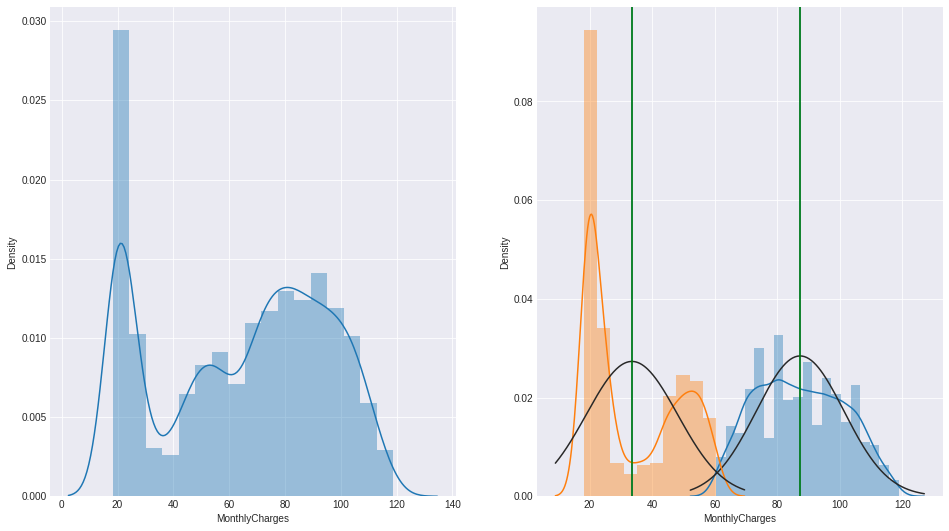

In [ ]:
from sklearn.cluster import KMeans


fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.distplot(telecom_df['MonthlyCharges'], ax=axes[0])
km_ = KMeans(n_clusters=2, random_state=0)
km_model = km_.fit(np.array(telecom_df['MonthlyCharges']).reshape(-1, 1))
telecom_df['MonthlyCharges_group'] = km_model.labels_
cluster_centers = km_model.cluster_centers_.ravel()
for i in cluster_centers:
    plt.axvline(i)
for i, (group, cluster_center) in enumerate(zip(telecom_df.groupby('MonthlyCharges_group')['MonthlyCharges'], cluster_centers)):
    sns.distplot(group[1], ax=axes[1], fit=norm)
    axes[1].axvline(cluster_center, c='g')
plt.show()

Первый кластер явно содержит в себе еще два. Надо рассмотреть более детально 

[33.53490415 70.17890625 82.24778296]


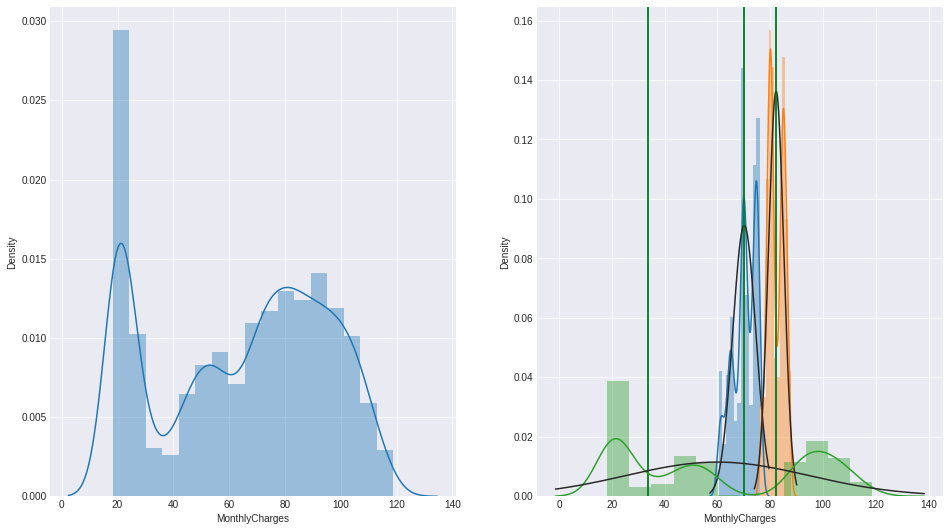

In [ ]:
telecom_df.loc[telecom_df['MonthlyCharges_group']==1, 'MonthlyCharges_group'] = 2
telecom_df_for_dist_1 = telecom_df[telecom_df['MonthlyCharges_group']==0]
km__ = KMeans(n_clusters=2, random_state=0)
km_model_ = km__.fit(np.array(telecom_df_for_dist_1['MonthlyCharges']).reshape(-1, 1))
telecom_df.loc[telecom_df['MonthlyCharges_group']==0, 'MonthlyCharges_group'] = km_model_.labels_
cluster_centers_ = np.r_[cluster_centers[1], km_model_.cluster_centers_.ravel()]
print(cluster_centers_)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.distplot(telecom_df['MonthlyCharges'], ax=axes[0])
for i in cluster_centers_:
    plt.axvline(i)
for i, (group, cluster_center) in enumerate(zip(telecom_df.groupby('MonthlyCharges_group')['MonthlyCharges'], cluster_centers_)):
    sns.distplot(group[1], ax=axes[1], fit=norm)
    axes[1].axvline(cluster_center, c='g')
plt.show()

Результат исследования влияния времени пребывания клиентом компании на размер месячного чека относительно оттока. 

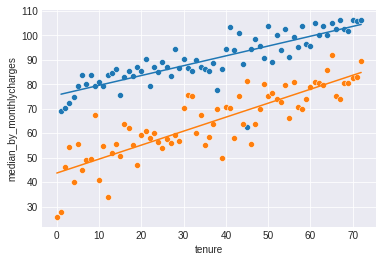

In [ ]:
telecom_df_for_monthlycharges_by_tenure_churn.rename(columns={'MonthlyCharges': 'median_by_monthlycharges'}, inplace=True)

telecom_df_for_monthlycharges_by_tenure_churn['values'] = telecom_df[['Churn', 'tenure', 'MonthlyCharges']]\
                                                .groupby(['Churn', 'tenure'])['MonthlyCharges'].apply(list)\
                                                .reset_index()['MonthlyCharges']

telecom_df_for_monthlycharges_by_tenure_churn['clusters_centers'] = 0
for churn in ['Yes', 'No']:
    data = telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == churn]
    x = data['tenure']
    y = data['median_by_monthlycharges']
    trend_model = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend_model)
    telecom_df_for_monthlycharges_by_tenure_churn\
    .loc[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == churn, 'clusters_centers'] = trendline(x)
    sns.scatterplot(x, y)
    plt.plot(x, trendline(x))
plt.show()

In [ ]:
telecom_df_for_high_risk_groupby_1 = telecom_df_for_monthlycharges_by_tenure_churn\
                                  .groupby('tenure')['clusters_centers']\
                                  .apply(list)\
                                  .reset_index()
print(telecom_df_for_high_risk_groupby_1)

    tenure                         clusters_centers
0        0                      [43.70613661606816]
1        1    [44.2776556522276, 75.97115677321158]
2        2   [44.84917468838705, 76.37304515831673]
3        3  [45.420693724546496, 76.77493354342188]
4        4   [45.99221276070595, 77.17682192852703]
..     ...                                      ...
68      68  [82.56943107491055, 102.89767857525672]
69      69     [83.14095011107, 103.29956696036186]
70      70  [83.71246914722946, 103.70145534546702]
71      71  [84.28398818338889, 104.10334373057216]
72      72  [84.85550721954834, 104.50523211567732]

[73 rows x 2 columns]


In [ ]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score


telecom_df_for_high_risk_groupby_1.iloc[0, 1].append(75)
telecom_df_for_high_risk = telecom_df.merge(telecom_df_for_high_risk_groupby_1)
telecom_df_for_high_risk['high_risk_by_monthlycharges'] = telecom_df_for_high_risk[['MonthlyCharges', 'clusters_centers']]\
.apply(lambda x: np.argmin([euclidean(x['MonthlyCharges'], i) for i in x['clusters_centers']]), axis=1)
telecom_df_for_high_risk['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
print('Процент совпадений -',\
      accuracy_score(telecom_df_for_high_risk['Churn'], telecom_df_for_high_risk['high_risk_by_monthlycharges']))

telecom_df = pd.merge(telecom_df, telecom_df_for_high_risk[['customerID', 'high_risk_by_monthlycharges']])

Процент совпадений - 0.6543601737387237


Слабое совпадение

Исследование влияния времени пребывания клиентом компании на кол-во подключенных опций относительно оттока. 

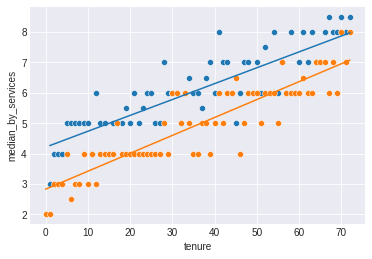

In [ ]:
telecom_df_for_services_by_tenure_churn.rename(columns={'services': 'median_by_services'}, inplace=True)
telecom_df_for_services_by_tenure_churn['values'] = telecom_df[['Churn', 'tenure', 'services']]\
                                                .groupby(['Churn', 'tenure'])['services'].apply(list)\
                                                .reset_index()['services']

telecom_df_for_services_by_tenure_churn['clusters_centers'] = 0
for churn in ['Yes', 'No']:
    data = telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == churn]
    x = data['tenure']
    y = data['median_by_services']
    
    trend_model = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend_model)
    
    telecom_df_for_services_by_tenure_churn\
    .loc[telecom_df_for_services_by_tenure_churn['Churn'] == churn, 'clusters_centers'] = trendline(x)
    sns.scatterplot(x, y)
    plt.plot(x, trendline(x))
plt.show()

In [ ]:
telecom_df_for_high_risk_groupby_2 = telecom_df_for_monthlycharges_by_tenure_churn\
                                  .groupby('tenure')['clusters_centers']\
                                  .apply(list)\
                                  .reset_index()
print(telecom_df_for_high_risk_groupby_2)

    tenure                         clusters_centers
0        0                      [43.70613661606816]
1        1    [44.2776556522276, 75.97115677321158]
2        2   [44.84917468838705, 76.37304515831673]
3        3  [45.420693724546496, 76.77493354342188]
4        4   [45.99221276070595, 77.17682192852703]
..     ...                                      ...
68      68  [82.56943107491055, 102.89767857525672]
69      69     [83.14095011107, 103.29956696036186]
70      70  [83.71246914722946, 103.70145534546702]
71      71  [84.28398818338889, 104.10334373057216]
72      72  [84.85550721954834, 104.50523211567732]

[73 rows x 2 columns]


In [ ]:
telecom_df_for_high_risk_groupby_2.iloc[0, 1].append(75)
telecom_df_for_high_risk = telecom_df.merge(telecom_df_for_high_risk_groupby_2)
telecom_df_for_high_risk['high_risk_by_services'] = telecom_df_for_high_risk[['services', 'clusters_centers']]\
.apply(lambda x: np.argmin([euclidean(x['services'], i) for i in x['clusters_centers']]), axis=1)
telecom_df_for_high_risk['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
print('Процент совпадений -',\
      accuracy_score(telecom_df_for_high_risk['Churn'], telecom_df_for_high_risk['high_risk_by_services']))

telecom_df = pd.merge(telecom_df, telecom_df_for_high_risk[['customerID', 'high_risk_by_services']])
telecom_df

Процент совпадений - 0.7348813899097895


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services,tenure_years,MonthlyCharges_group,high_risk_by_monthlycharges,high_risk_by_services
0,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,2,6,2,0,0
1,9688-YGXVR,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,6,4,2,1,0
2,9286-DOJGF,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,4,4,0,0,0
3,6994-KERXL,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,4,1,2,0,0
4,2181-UAESM,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,4,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,No,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,6,1,2,1,0
5982,5982-PSMKW,Female,No,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No,10,2,2,1,0
5983,8044-BGWPI,Male,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,2,1,2,0,0
5984,7450-NWRTR,Male,Yes,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,7,1,2,1,0


In [ ]:
print(len(telecom_df[(telecom_df['PhoneService'] == 'No')\
    & ((telecom_df['MultipleLines'] == 'Yes') | (telecom_df['MultipleLines'] == 'No'))]))
print(len(telecom_df[(telecom_df['PhoneService'] == 'Yes') & (telecom_df['MultipleLines'] == 'No phone service')]))

0
0


In [ ]:
internetservices = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in internetservices:
    print(len(telecom_df[(telecom_df['InternetService'] == 'No')
        & ((telecom_df[column] == 'Yes') | (telecom_df[column] == 'No'))]))

0
0
0
0
0
0


После построчной отчискти данных ошибок нет.

In [ ]:
telecom_df_for_ml =\
telecom_df.drop(['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges', 'services'], axis=1)

#удаление маловажных признаков 

In [ ]:
#Кодирование значений 
from sklearn.preprocessing import LabelEncoder


def transform(df):
    transform_df = df.copy()
    le_dict = {column:LabelEncoder() for column in df.columns}
    for column, le_model in le_dict.items():
        le_dict[column] = le_model.fit(df[column])
        transform_df[column] = le_dict[column].transform(df[column])
    return transform_df, le_dict

def inverse_transform(transform_df, le_dict):
    inverse_transform_df = transform_df.copy()
    for column, le_model in le_dict.items():
        inverse_transform_df[column] = le_dict[column].inverse_transform(transform_df[column])
    return inverse_transform_df, le_dict

df_for_learning = transform(telecom_df_for_ml)[0]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

x = df_for_learning.drop('Churn', axis=1)
y = df_for_learning['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
skf = StratifiedKFold(n_splits=5, random_state=None)
train, test = train_test_split(df_for_learning, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

from sklearn.svm import SVC, NuSVC, OneClassSVM, LinearSVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

from sklearn.linear_model import LogisticRegressionCV, ElasticNetCV, RidgeClassifierCV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import recall_score, roc_auc_score

In [ ]:
base_classifiers = [ExtraTreeClassifier, DecisionTreeClassifier, SVC, NuSVC, OneClassSVM, LinearSVC, MLPClassifier,
                    KNeighborsClassifier, NearestCentroid, BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB,
                    ComplementNB, LogisticRegressionCV, RidgeClassifierCV,
                    LinearDiscriminantAnalysis]

classifier_names, recall_scores, roc_auc_scores = [], [], []
for classifier in base_classifiers:
    try:
        estimator = classifier(random_state=0)
    except TypeError:
        estimator = classifier()
    model = estimator.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    if -1 in y_pred:
        y_pred[y_pred == -1] = 0
    y_pred = [0 if i <= 0.5 else 1 for i in y_pred]
    classifier_names += [classifier.__name__]
    roc_auc_scores += [roc_auc_score(y_test, y_pred)]
    recall_scores += [recall_score(y_test, y_pred)]

base_classifiers_df = pd.DataFrame(data=zip(classifier_names, roc_auc_scores, recall_scores),
                                   columns=['classifier', 'roc_auc', 'recall'])
base_classifiers_df = base_classifiers_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_df

,classifier,roc_auc,recall
0,CategoricalNB,0.751308,0.809524
1,GaussianNB,0.748877,0.717460
2,ComplementNB,0.744049,0.790476
3,BernoulliNB,0.740718,0.707937
4,MultinomialNB,0.733776,0.647619
5,LinearDiscriminantAnalysis,0.730779,0.555556
6,LogisticRegressionCV,0.727604,0.549206
7,LinearSVC,0.724086,0.536508
8,SVC,0.712511,0.495238
9,RidgeClassifierCV,0.707638,0.488889


Подбор гипперпарамктпов 

In [ ]:
classifier_names_GS, roc_auc_scores_GS, recall_scores_GS  = [], [], []

In [ ]:
from sklearn.model_selection import GridSearchCV


cnb = CategoricalNB(alpha=0.52)
cnb_params = {
# 'alpha':np.arange(0, 1, 0.01),
}

cnb_GS = GridSearchCV(estimator=cnb, param_grid=cnb_params, cv=skf, n_jobs=-1)
cnb_GS_model = cnb_GS.fit(x_train, y_train)
cnb_y_pred = cnb_GS_model.predict(x_test)
classifier_names_GS += ['CategoricalNB']
roc_auc_scores_GS += [roc_auc_score(y_test, cnb_y_pred)]
recall_scores_GS += [recall_score(y_test, cnb_y_pred)]
print('cnb_GS_model.best_params_', cnb_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, cnb_y_pred))
print('recall', recall_score(y_test, cnb_y_pred))

cnb_GS_model.best_params_ {}
roc_auc 0.7513077711265707
recall 0.8095238095238095


In [ ]:
gnb = GaussianNB(var_smoothing=1e-10)
# gnb = GaussianNB()
gnb_params = {
# 'var_smoothing':np.arange(1e-10, 1e-8, 1e-10),
}
gnb_GS = GridSearchCV(estimator=gnb, param_grid=gnb_params, cv=skf, n_jobs=-1)
gnb_GS_model = gnb_GS.fit(x_train, y_train)
gnb_y_pred = gnb_GS_model.predict(x_test)
classifier_names_GS += ['GaussianNB']
roc_auc_scores_GS += [roc_auc_score(y_test, gnb_y_pred)]
recall_scores_GS += [recall_score(y_test, gnb_y_pred)]
print('gnb_GS_model.best_params_', gnb_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, gnb_y_pred))
print('recall', recall_score(y_test, gnb_y_pred))

gnb_GS_model.best_params_ {}
roc_auc 0.7488773840982221
recall 0.7174603174603175


In [ ]:
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True, tol=10e-08)
# lda = LinearDiscriminantAnalysis()
lda_params = {
# 'solver':['svd', 'lsqr'],
# 'store_covariance':[True, False],
# 'tol':np.arange(1.0e-8, 2.0e-6, 5.0e-8)
}
lda_GS = GridSearchCV(estimator=lda, param_grid=lda_params, cv=skf, n_jobs=-1)
lda_GS_model = lda_GS.fit(x_train, y_train)
lda_y_pred = lda_GS_model.predict(x_test)
classifier_names_GS += ['LinearDiscriminantAnalysis']
roc_auc_scores_GS += [roc_auc_score(y_test, lda_y_pred)]
recall_scores_GS += [recall_score(y_test, lda_y_pred)]
print('lda_GS_model.best_params_', lda_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, lda_y_pred))
print('recall', recall_score(y_test, lda_y_pred))

lda_GS_model.best_params_ {}
roc_auc 0.730778910280609
recall 0.5555555555555556


In [ ]:
lrcv = LogisticRegressionCV(Cs=5, cv=skf, dual=False, multi_class='auto', penalty='l1', solver='saga',
    refit=False, random_state=0, n_jobs=-1)
# lrcv = LogisticRegressionCV()
lrcv_params = {
# 'Cs':range(5, 14),
# 'cv':[range(2, 5), skf, None],
# 'dual':[True, False],
# 'penalty':['l1', 'l2', 'elasticnet'],
# 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
# 'refit':[True, False],
# 'multi_class':['auto', 'ovr', 'multinomial']
}
lrcv_GS = GridSearchCV(estimator=lrcv, param_grid=lrcv_params, cv=skf, n_jobs=-1)
lrcv_GS_model = lrcv_GS.fit(x_train, y_train)
lrcv_y_pred = lrcv_GS_model.predict(x_test)
classifier_names_GS += ['LogisticRegressionCV']
roc_auc_scores_GS += [roc_auc_score(y_test, lrcv_y_pred)]
recall_scores_GS += [recall_score(y_test, lrcv_y_pred)]
print('lrcv_GS_model.best_params_', lrcv_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, lrcv_y_pred))
print('recall', recall_score(y_test, lrcv_y_pred))

lrcv_GS_model.best_params_ {}
roc_auc 0.689491092775351
recall 0.44126984126984126


In [ ]:
rccv = RidgeClassifierCV(cv=skf, fit_intercept=True, normalize=False, store_cv_values=False)
# rcсv = RidgeClassifierCV()
rccv_params = {
# 'fit_intercept':[True, False],
# 'normalize':[True, False],
# 'cv':[range(2, 5), skf, None],
# 'class_weight':['balanced', None],
# 'store_cv_values':[True, False],
}
rccv_GS = GridSearchCV(estimator=rccv, param_grid=rccv_params, cv=skf, n_jobs=-1)
rccv_GS_model = rccv_GS.fit(x_train, y_train)
rccv_y_pred = rccv_GS_model.predict(x_test)
classifier_names_GS += ['RidgeClassifierCV']
roc_auc_scores_GS += [roc_auc_score(y_test, rccv_y_pred)]
recall_scores_GS += [recall_score(y_test, rccv_y_pred)]
print('rccv_GS_model.best_params_', rccv_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, rccv_y_pred))
print('recall', recall_score(y_test, rccv_y_pred))

rccv_GS_model.best_params_ {}
roc_auc 0.710246454187564
recall 0.49523809523809526


In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='random', random_state=0)
# dtc = DecisionTreeClassifier()
dtc_params = {
# 'criterion':["gini", "entropy"],
# 'splitter':["best", "random"],
# 'max_depth':range(2, 7),
}
dtc_GS = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv=skf, n_jobs=-1)
dtc_GS_model = dtc_GS.fit(x_train, y_train)
dtc_y_pred = dtc_GS_model.predict(x_test)
classifier_names_GS += ['DecisionTreeClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, dtc_y_pred)]
recall_scores_GS += [recall_score(y_test, dtc_y_pred)]
print('dtc_GS_model.best_params_', dtc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, dtc_y_pred))
print('recall_score', recall_score(y_test, dtc_y_pred))

dtc_GS_model.best_params_ {}
roc_auc_score 0.6801057002642507
recall_score 0.4666666666666667


In [ ]:
knc = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=71, n_jobs =-1)
# knc = KNeighborsClassifier()
knc_params = {
# 'n_neighbors':range(50, 100),
# 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knc_GS = GridSearchCV(estimator=knc, param_grid=knc_params, cv=skf, n_jobs=-1)
knc_GS_model = knc_GS.fit(x_train, y_train)
knc_y_pred = knc_GS_model.predict(x_test)
classifier_names_GS += ['KNeighborsClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, knc_y_pred)]
recall_scores_GS += [recall_score(y_test, knc_y_pred)]
print('knc_GS_model.best_params_', knc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, knc_y_pred))
print('recall_score', recall_score(y_test, knc_y_pred))

knc_GS_model.best_params_ {}
roc_auc_score 0.7382785956964893
recall_score 0.6


In [ ]:
base_classifiers_GS_df = pd.DataFrame(data=zip(classifier_names_GS, roc_auc_scores_GS, recall_scores_GS),
                                   columns=['classifier', 'roc_auc', 'recall'])
# отсортируем датафрейм по roc-auc метрике в порядке убывания, а также проиндексируем по порядку
base_classifiers_GS_df = base_classifiers_GS_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_GS_df

,classifier,roc_auc,recall
0,CategoricalNB,0.751308,0.809524
1,GaussianNB,0.748877,0.717460
2,KNeighborsClassifier,0.738279,0.600000
3,LinearDiscriminantAnalysis,0.730779,0.555556
4,RidgeClassifierCV,0.710246,0.495238
5,LogisticRegressionCV,0.689491,0.441270
6,DecisionTreeClassifier,0.680106,0.466667


Перейдем к ансаблям алгоритмов. Будем использовать 
*     комитеты (BaggingClassifier, Random forest)
*   бустинг (XGBoost)
*   QLattice
*   стекинг (StackingClassifier)

Но для начала подберём гипперпараметры для ансамблей.

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


bc = BaggingClassifier(base_estimator=lrcv, n_estimators=1, max_features=19, oob_score=True, n_jobs=-1, random_state=0)
# bc = BaggingClassifier(n_jobs=-1, random_state=0)
bc_params = {
# 'base_estimator':[lda, lrcv, rccv, dtc],
# 'n_estimators':range(1, 9),
# 'max_features':range(16, 22),
# 'bootstrap_features':[True, False],
# 'oob_score':[True, False],
# 'warm_start':[True, False],
}
bc_GS = GridSearchCV(estimator=bc, param_grid=bc_params, cv=skf, n_jobs=-1)
bc_GS_model = bc_GS.fit(x_train, y_train)
bc_y_pred = bc_GS_model.predict(x_test)
classifier_names_GS += ['BaggingClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, bc_y_pred)]
recall_scores_GS += [recall_score(y_test, bc_y_pred)]
print('bc_GS_model.best_params_', bc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, bc_y_pred))
print('recall_score', recall_score(y_test, bc_y_pred))

bc_GS_model.best_params_ {}
roc_auc_score 0.7264628161570403
recall_score 0.5333333333333333


Мы улучшили показатели LogisticRegressionCV

In [ ]:
rfc = RandomForestClassifier(n_estimators=186,  max_depth=6, oob_score=True, warm_start=True, n_jobs=-1, random_state=0)
# rfc = RandomForestClassifier(n_jobs=-1, random_state=0)
rfc_params = {
# 'n_estimators':range(1000, 200),
# 'max_depth':range(6, 50),
# 'criterion':['gini', 'entropy'],
# 'oob_score':[True, False],
# 'warm_start':[True, False]
}
rfc_GS = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf, n_jobs=-1)
rfc_GS_model = rfc_GS.fit(x_train, y_train)
rfc_y_pred = rfc_GS_model.predict(x_test)
classifier_names_GS += ['RandomForestClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, rfc_y_pred)]
recall_scores_GS += [recall_score(y_test, rfc_y_pred)]
print('rfc_GS_model.best_params_', rfc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, rfc_y_pred))
print('recall_score', recall_score(y_test, rfc_y_pred))

rfc_GS_model.best_params_ {}
roc_auc_score 0.6956173938053892
recall_score 0.4603174603174603


Подбор гиперпараметров для ансамблей типа бустинг. 

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1
)
xgbc_params = {
    'max_depth':range(1,10),
    'min_child_weight':range(8,20)
}
xgbc_GS = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
y_pred = xgbc_GS_model.predict(x_test)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))

xgbc_GS_model.best_params_ {'max_depth': 3, 'min_child_weight': 11}
roc_auc_score 0.7201225979255423
recall_score 0.5365079365079365


мы получили необходимые значения параметров max_depth (3) и min_child_weight (13) и результат по AUC-ROC (0.723)

In [ ]:
xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=3,
    min_child_weight=13
)
xgbc_params = {
    'gamma':np.arange(0, 0.1, 0.01),
    'scale_pos_weight':np.arange(0.5, 3, 0.1)
}
xgbc_GS = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
y_pred = xgbc_GS_model.predict(x_test)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))

xgbc_GS_model.best_params_ {'gamma': 0.08, 'scale_pos_weight': 2.0999999999999996}
roc_auc_score 0.7533049308813748
recall_score 0.7365079365079366


Мы нашли лучшее значения параметров gamma (0) и scale_pos_weight (2.1), а также улучшили результат алгоритма (0.7606).

In [ ]:
xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=13,
    gamma=0,
    scale_pos_weight=2.1,
)
xgbc_params = {
    'subsample':np.arange(0.1, 1, 0.05),
    'colsample_bytree':np.arange(0.1, 1, 0.05),
}
xgbc_GS = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
xgbc_y_pred = xgbc_GS_model.predict(x_test)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, xgbc_y_pred))
print('recall_score', recall_score(y_test, xgbc_y_pred))

xgbc_GS_model.best_params_ {'colsample_bytree': 0.8500000000000002, 'subsample': 0.9500000000000003}
roc_auc_score 0.7547807798090924
recall_score 0.7428571428571429


In [ ]:
#конечная модель
xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=13,
    gamma=0,
    scale_pos_weight=2.1,
    subsample=0.7,
    colsample_bytree=0.2)

xgbc_model = xgbc.fit(x_train, y_train)
xgbc_y_pred = xgbc_model.predict(x_test)
classifier_names_GS += ['XGBClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, xgbc_y_pred)]
recall_scores_GS += [recall_score(y_test, xgbc_y_pred)]
print('roc_auc_score', roc_auc_score(y_test, xgbc_y_pred))
print('recall_score', recall_score(y_test, xgbc_y_pred))

roc_auc_score 0.7628287404051843
recall_score 0.7555555555555555


colsample_bytree (0.2) и subsample (0.7). Итоговая оценка - 0.762.

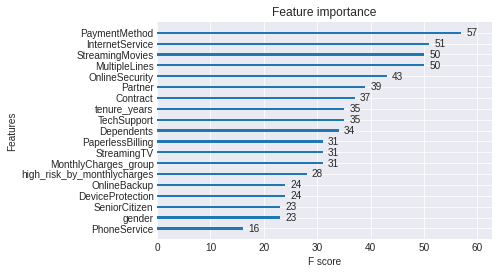

In [ ]:
xgb.plot_importance(xgbc_model)

Подбор гиперпараметров для ансамбля типа стекинг. 

In [ ]:
estimators = [cnb, gnb, knc, lda, rccv, lrcv, dtc]

In [ ]:
def meta_matrix(estimators, x_train, x_test, y_train, cv=5):
    from sklearn.model_selection import cross_val_predict

    
    meta_mtrx_train = np.empty((len(x_train), len(estimators)))
    meta_mtrx_test = np.empty((len(x_test), len(estimators)))
    for n, estimator in enumerate(estimators):
        meta_mtrx_train[:, n] = cross_val_predict(estimator, x_train, y_train, cv=cv, method='predict')
        meta_mtrx_test[:, n] = estimator.fit(x_train, y_train).predict(x_test)
    return meta_mtrx_train, meta_mtrx_test

# две матрицы метапризнаков (тренировочная и тестовая)
meta_mtrx_train, meta_mtrx_test = meta_matrix(estimators, x_train, x_test, y_train)

In [ ]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1
)
xgb_stacking_params = {
    'max_depth':range(1, 10),
    'min_child_weight':range(1, 15)
}
xgb_stacking_GS = GridSearchCV(
    estimator=xgb_stacking,
    param_grid=xgb_stacking_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgb_stacking_GS_model = xgb_stacking_GS.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_GS_model.predict(meta_mtrx_test)
print('xgb_stacking_GS_model.best_params_', xgb_stacking_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

xgb_stacking_GS_model.best_params_ {'max_depth': 2, 'min_child_weight': 14}
roc_auc_score 0.7298872890039368
recall_score 0.580952380952381


In [ ]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=2,
    min_child_weight=9
)
xgb_stacking_params = {
    'gamma':np.arange(5, 7, 0.1),
    'scale_pos_weight':np.arange(0, 5, 0.5)
}
xgb_stacking_GS = GridSearchCV(
    estimator=xgb_stacking,
    param_grid=xgb_stacking_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgb_stacking_GS_model = xgb_stacking_GS.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_GS_model.predict(meta_mtrx_test)
print('xgb_stacking_GS_model.best_params_', xgb_stacking_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

xgb_stacking_GS_model.best_params_ {'gamma': 5.1, 'scale_pos_weight': 4.5}
roc_auc_score 0.7507415197109422
recall_score 0.8095238095238095


In [ ]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=2,
    min_child_weight=9,
    gamma=6.8,
    scale_pos_weight=3.5
)
xgb_stacking_params = {
    'subsample':np.arange(0.1, 1, 0.05),
    'colsample_bytree':np.arange(0.1, 1, 0.05),
}
xgb_stacking_GS = GridSearchCV(
    estimator=xgb_stacking,
    param_grid=xgb_stacking_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgb_stacking_GS_model = xgb_stacking_GS.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_GS_model.predict(meta_mtrx_test)
print('xgb_GS_model.best_params_', xgb_stacking_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

xgb_GS_model.best_params_ {'colsample_bytree': 0.45000000000000007, 'subsample': 0.6000000000000002}
roc_auc_score 0.7513077711265707
recall_score 0.8095238095238095


In [ ]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=2,
    min_child_weight=9,
    gamma=6.8,
    scale_pos_weight=3.5,
    subsample=0.65,
    colsample_bytree=0.1
    )

xgb_stacking_model = xgb_stacking.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_model.predict(meta_mtrx_test)
classifier_names_GS += ['Stacking']
roc_auc_scores_GS += [roc_auc_score(y_test, stacking_y_pred)]
recall_scores_GS += [recall_score(y_test, stacking_y_pred)]
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

roc_auc_score 0.7556903773211814
recall_score 0.7492063492063492


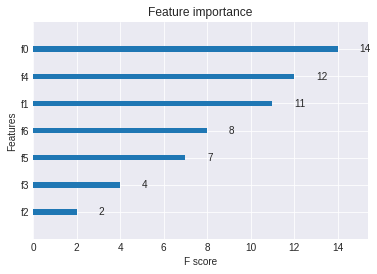

In [ ]:
xgb.plot_importance(xgb_stacking_model)

In [ ]:
base_classifiers_GS_df = pd.DataFrame(data=zip(classifier_names_GS, roc_auc_scores_GS, recall_scores_GS),
                                   columns=['classifier', 'roc_auc', 'recall'])
base_classifiers_GS_df = base_classifiers_GS_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_GS_df

,classifier,roc_auc,recall
0,XGBClassifier,0.762829,0.755556
1,Stacking,0.755690,0.749206
2,CategoricalNB,0.751308,0.809524
3,GaussianNB,0.748877,0.717460
4,KNeighborsClassifier,0.738279,0.600000
5,LinearDiscriminantAnalysis,0.730779,0.555556
6,BaggingClassifier,0.726463,0.533333
7,RidgeClassifierCV,0.710246,0.495238
8,RandomForestClassifier,0.695617,0.460317
9,LogisticRegressionCV,0.689491,0.441270


# 4. Сравнение качества моделей 

XGBClassifier

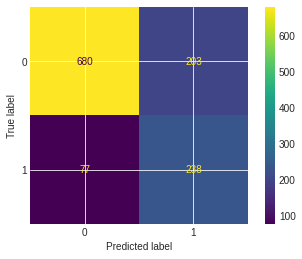

In [ ]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(xgbc_model, x_test, y_test)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 315 человек, из них алгоритмом 239 определены верно и 76 неверно.

CategoricalNB

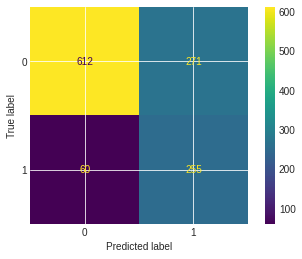

In [ ]:
plot_confusion_matrix(cnb_GS_model, x_test, y_test)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 315 человек, из них алгоритмом 257 определены верно и 58 неверно.

GaussianNB

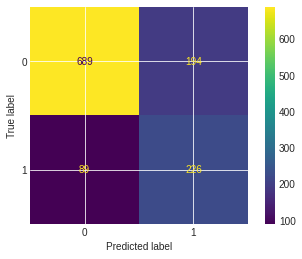

In [ ]:
plot_confusion_matrix(gnb_GS_model, x_test, y_test)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 315 человек, из них алгоритмом 226 определены верно и 89 неверно.

ROC-кривая

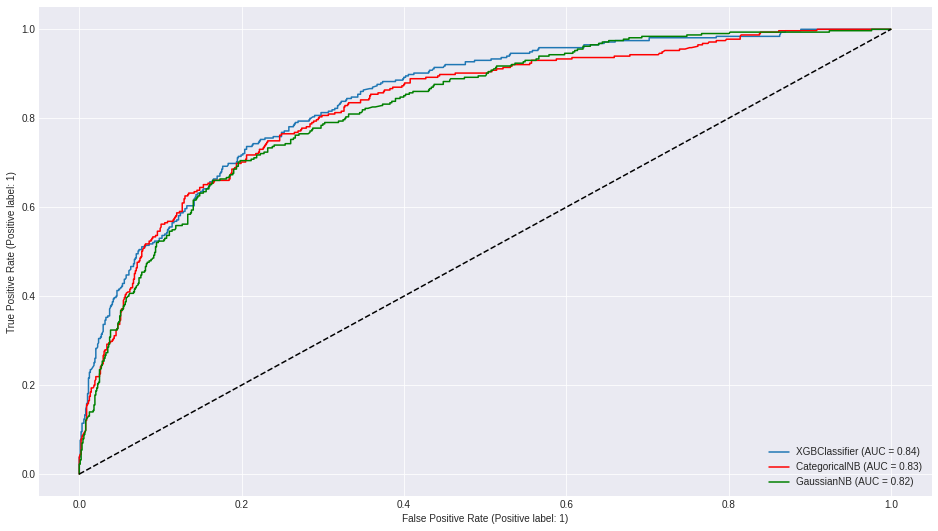

In [ ]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(16, 9))
plot_roc_curve(xgbc_model, x_test, y_test, ax=ax, name='XGBClassifier')
plot_roc_curve(cnb_GS_model, x_test, y_test, color='r', ax=ax, name='CategoricalNB')
plot_roc_curve(gnb_GS_model, x_test, y_test, color='g', ax=ax, name='GaussianNB')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

Почти все три отработали одинаково. Хотя можно заметить, что бустинг чаще других появляется сверху остальных графиков.

**Вывод**

Из-за того что CategoricalNB имеет самый высокий показаткль метрики recall, я считаю, что этот алгоритм подходит лучше остальных для решения задачи оттока клиентов рассматриваемой компании.

In [ ]:
#готовый код

cnb = CategoricalNB(alpha=0.52)
cnb_model = cnb.fit(x_train, y_train)
cnb_y_pred = cnb_model.predict(x_test)
print('roc_auc', roc_auc_score(y_test, cnb_y_pred))
print('recall', recall_score(y_test, cnb_y_pred))

roc_auc 0.7513077711265707
recall 0.8095238095238095
